## This notebook contains codes for feature engineering and machine learning algorithms performed on the titanic dataset available on Kaggle.com

In [408]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [277]:
# importing data
data = pd.read_csv("train.csv")
df = pd.DataFrame(data)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [279]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [280]:
total = df.isnull().sum().sort_values(ascending = False)
percent_1 =df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending = False)
missing_data = pd.concat([total, percent_2], axis = 1, keys = ['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [281]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [282]:
round(df.Embarked.value_counts()/len(df.Embarked)*100, 2)

Embarked
S    72.28
C    18.86
Q     8.64
Name: count, dtype: float64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

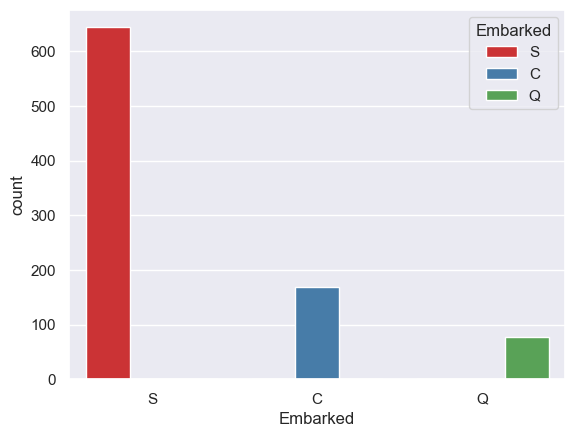

In [283]:
sns.set(style = "darkgrid")
sns.countplot(x = 'Embarked', data = df, hue = "Embarked", palette = 'Set1')

<AxesSubplot:xlabel='Survived', ylabel='count'>

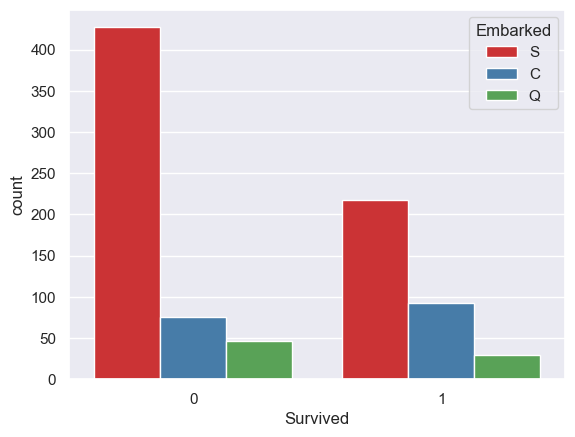

In [284]:
sns.set(style = "darkgrid")
sns.countplot(x = 'Survived', data = df, hue = 'Embarked', palette = 'Set1')

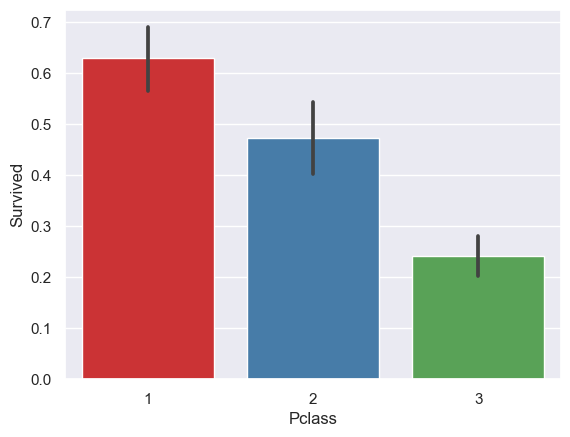

In [285]:
sns.barplot(x='Pclass', y='Survived', data=df, palette = 'Set1');

C:\Users\User\AppData\Local\Temp\ipykernel_25552\411321486.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'], ax = axes[0])
C:\Users\User\AppData\Local\Temp\ipykernel_25552\411321486.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], ax = axes[1])
C:\Users\User\AppData\L

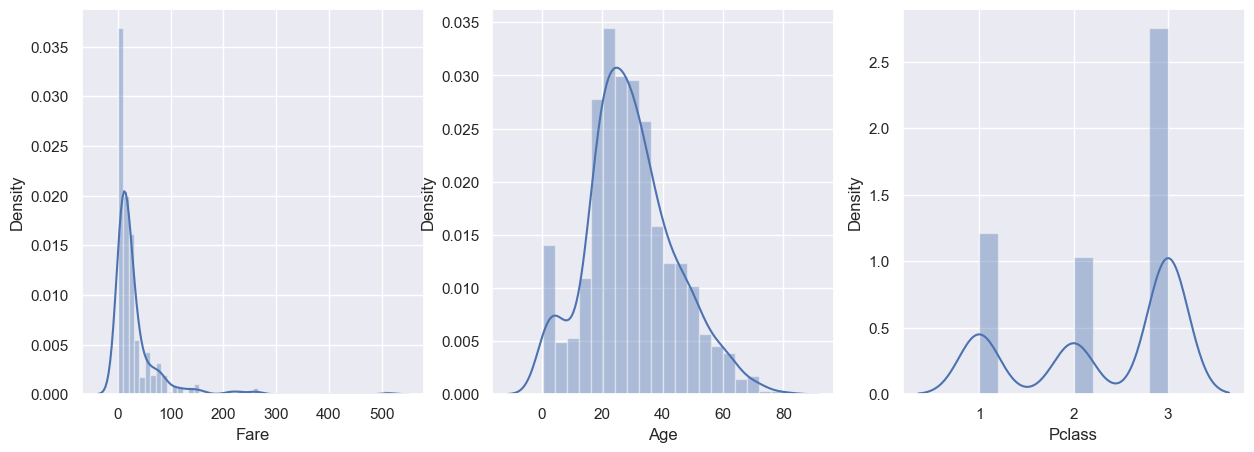

In [286]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5))
sns.distplot(df['Fare'], ax = axes[0])
sns.distplot(df['Age'], ax = axes[1])
sns.distplot(df['Pclass'], ax = axes[2])
plt.show();

In [287]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Preprocessing / Feature Engineering

In [288]:
# Extracting Deck from Cabin (Instinct : Alphabet in the cabin code might be the deck number)

def cabin(df):
    
    deck = {"A": "A", "B":"B", "C":"C", "D":"D", "E": "E", "F":"F", "G":"G", "U":"U"}

    df.Cabin = df.Cabin.fillna("U0")
    df['Deck'] = df.Cabin.map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    df['Deck'] = df.Deck.map(deck)
    new_deck = pd.get_dummies(df.Deck)
    df = df.join(new_deck, how = 'left', lsuffix='left', rsuffix='right')
    
    return df


df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})

    
# Binning age
def age(df):
    mean = df.Age.mean()
    std = df.Age.std()
    total_null = df.Age.isnull().sum()

    #compute random numbers between the mean,std and total_null
    rand_age = np.random.randint(mean - std, mean + std, size = total_null)

    # Fill NaN values with the random values generated.
    df.Age[np.isnan(df.Age)] = rand_age
    
    # Binning Age
    df["Age_Range"] = pd.cut(df.Age, bins = [0,9,19,40,60,100], labels = ["Child", "Teenager", "Young", "Adults", "Aged"])
    df = df.join(pd.get_dummies(df.Age_Range))
        
    return df


# Name titles can make a new feature

def name(df):    
    
    titles = {"Mr": 1, "Miss" : 2, "Mrs": 3, "Master": 4, "Rare": 5}

    # extracting titles from name
    df['title'] = df.Name.str.extract('([A-Za-z]+)\.', expand = False)

    # replace titles with a more common title or as Rare
    df.title = df.title.replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df.title = df.title.replace('Mlle', 'Miss')
    df.title = df.title.replace('Ms', 'Miss')
    df.title = df.title.replace('Mme', 'Mrs')

    # Converting titles to numbers
    df.title = df.title.map(titles)
    
    return df


# Parch and SibSp can make a new feature
def relatives(df):
    df["relatives"] = (df.SibSp + df.Parch)
    df.loc[df.relatives > 0, 'travelled_alone'] = 'not_alone'
    df.loc[df.relatives == 0, 'travelled_alone'] = 'alone'
    
    new_travelled = pd.get_dummies(df.travelled_alone)
    df = df.join(new_travelled)

    return df


def embarked(df):
    df["Embarked"] = df.Embarked.fillna('S')
    new_embarked = pd.get_dummies(df.Embarked)
    df = df.join(new_embarked, how = 'left', lsuffix='left', rsuffix='right')
    
    return df


# Getting unwanted columns dropped
def drop_unwanted_columns(df):
    df.drop(columns = ['Age_Range', 'Deck', 'travelled_alone', 'Embarked', 'Cabin', 'Ticket', 'Name', 'PassengerId'], axis = 1, inplace = True)
    
    return df

### Checking Outliers in Fare

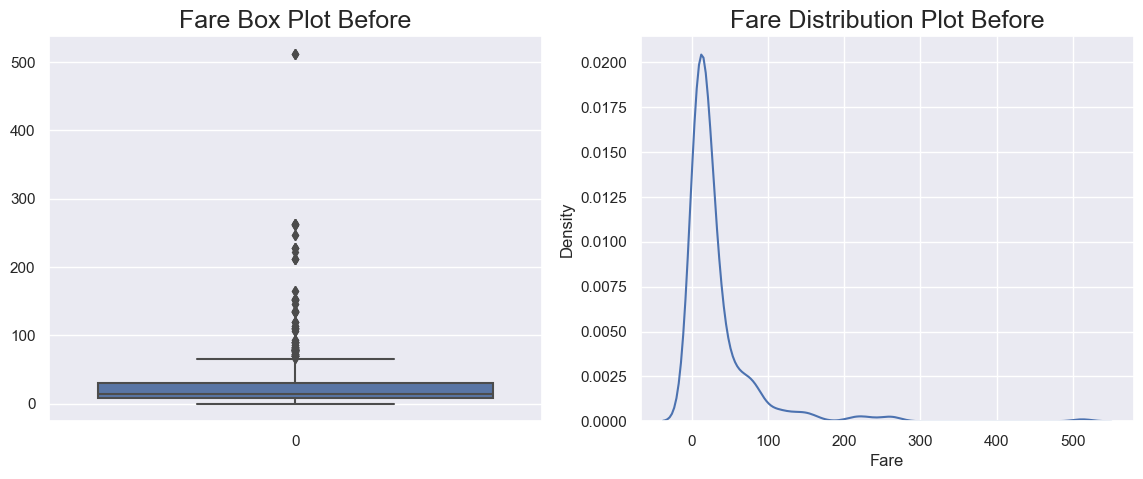

In [289]:
fig, axes = plt.subplots(1, 2, figsize = (14, 5))
sns.boxplot(df.Fare, ax = axes[0]).set_title('Fare Box Plot Before', fontsize = 18)

sns.kdeplot(df.Fare, ax = axes[1]).set_title('Fare Distribution Plot Before', fontsize = 18)
plt.show()

Here its clear that the data contains outlier and is not normalized. 
## Removing outliers by Interquartile Range

Inter-quartile range is used to measure variability by dividing a data set into quartiles.
The  data is sorted in ascending order and split into 4 equal parts.

Q1, Q2, Q3 called the first, second and third quartiles are the values that separate the 4 equal parts.

Q1 represents the 25th percentile of the data.
Q2 represents the 50th percentile of the data.
Q3 represents the 75th percentile of the data.

And if a dataset has 2n/2n+1 data points, then

Q1 = median of the dataset.
Q2 = median of n smallest data points.
Q3 = median of n highest data points.

IQR is the range between the first and the third quartiles namely Q1 and Q3:
IQR = Q3 - Q1
The data points which fall below Lower limit(Q1 - 1.5*IQR) or above Upper limit(Q3 + 1.5*IQR) are outliers.

In [290]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [291]:
def removing_outliers(df):
    Q1 = df.Fare.quantile(0.10)
    Q3 = df.Fare.quantile(0.785)

    IQR = Q3 - Q1


    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    df.loc[(df['Fare'] < lower_limit), 'Fare'] = lower_limit
    df.loc[(df['Fare'] > upper_limit), 'Fare'] = upper_limit
    
    return df

In [292]:
# Fare column should be processed after removing outliers which is done below. 
# So, Fare function and Scale columns functions are piped at the bottom of Data preprocessing section.
def fare(df):
    df['Fare_range'] = pd.cut(df.Fare, bins = [0,20,40,60,80],  labels = ["Low_fare", "Medium_low_fare", "Medium_high_fare", "High_fare"])
    df = df.join(pd.get_dummies(df['Fare_range']))
    df = df.drop('Fare_range', axis = 1)
    
    return df

def scale_columns(df):
    df[['Age', 'Fare']] = StandardScaler().fit_transform(df[['Age', 'Fare']])
    
    return df

## Connecting pipes 


In [293]:
# use this code to preprocess data when needed (replace df with the name of your dataframe)

#df = df.pipe(cabin).pipe(age).pipe(name).pipe(relatives).pipe(embarked).pipe(drop_unwanted_columns).pipe(removing_outliers).pipe(fare).pipe(scale_columns)

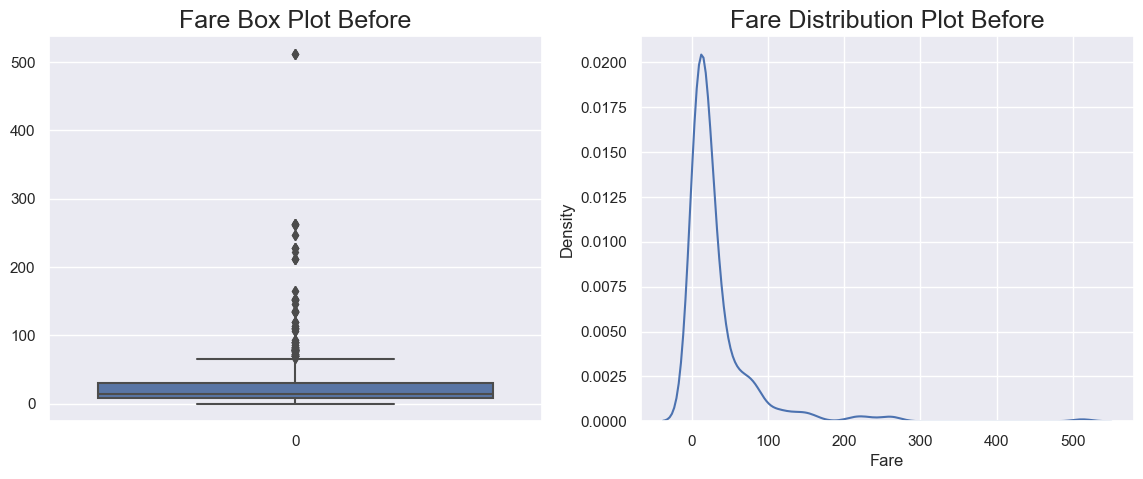

In [294]:
fig, axes = plt.subplots(1, 2, figsize = (14, 5))
sns.boxplot(df.Fare, ax = axes[0]).set_title('Fare Box Plot Before', fontsize = 18)

sns.kdeplot(df.Fare, ax = axes[1]).set_title('Fare Distribution Plot Before', fontsize = 18)
plt.show()

In [295]:
df.Fare.skew()

4.787316519674893

In [296]:
# sns.heatmap(df.corr())

In [297]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
PassengerId,1,2,3,4,5,6,7,8,9,10,...,882,883,884,885,886,887,888,889,890,891
Survived,0,1,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
Pclass,3,1,3,1,3,3,1,3,3,2,...,3,3,2,3,3,2,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry","Moran, Mr. James","McCarthy, Mr. Timothy J","Palsson, Master. Gosta Leonard","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","Nasser, Mrs. Nicholas (Adele Achem)",...,"Markun, Mr. Johann","Dahlberg, Miss. Gerda Ulrika","Banfield, Mr. Frederick James","Sutehall, Mr. Henry Jr","Rice, Mrs. William (Margaret Norton)","Montvila, Rev. Juozas","Graham, Miss. Margaret Edith","Johnston, Miss. Catherine Helen ""Carrie""","Behr, Mr. Karl Howell","Dooley, Mr. Patrick"
Sex,0,1,1,1,0,0,0,0,1,1,...,0,1,0,0,1,0,1,1,0,0
Age,22.0,38.0,26.0,35.0,35.0,NaN,54.0,2.0,27.0,14.0,...,33.0,22.0,28.0,25.0,39.0,27.0,19.0,NaN,26.0,32.0
SibSp,1,1,0,1,0,0,0,3,0,1,...,0,0,0,0,0,0,0,1,0,0
Parch,0,0,0,0,0,0,0,1,2,0,...,0,0,0,0,5,0,0,2,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450,330877,17463,349909,347742,237736,...,349257,7552,C.A./SOTON 34068,SOTON/OQ 392076,382652,211536,112053,W./C. 6607,111369,370376
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708,...,7.8958,10.5167,10.5,7.05,29.125,13.0,30.0,23.45,30.0,7.75


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

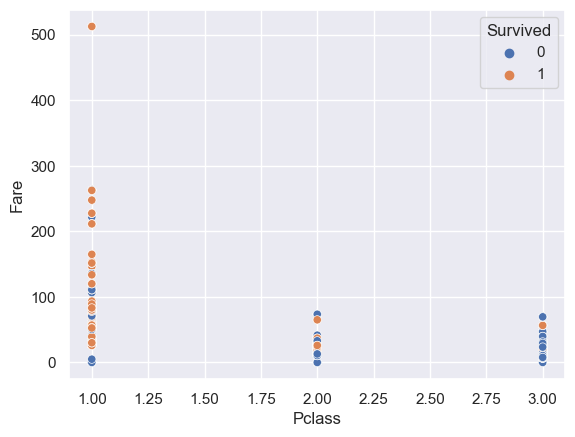

In [298]:
sns.scatterplot(y = df.Fare, x = df.Pclass, data = df, hue='Survived')

## Splitting data

In [361]:
X = df.drop('Survived', axis = 1)
y = df.Survived

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.75, random_state = 42)


In [362]:
# taking training and validation sets separately in our pipeline

X_train = X_train.pipe(cabin).pipe(age).pipe(name).pipe(relatives).pipe(embarked).pipe(drop_unwanted_columns).pipe(removing_outliers).pipe(fare).pipe(scale_columns)

X_val = X_val.pipe(cabin).pipe(age).pipe(name).pipe(relatives).pipe(embarked).pipe(drop_unwanted_columns).pipe(removing_outliers).pipe(fare).pipe(scale_columns)

C:\Users\User\AppData\Local\Temp\ipykernel_25552\4227764584.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Age[np.isnan(df.Age)] = rand_age
C:\Users\User\AppData\Local\Temp\ipykernel_25552\4227764584.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Age[np.isnan(df.Age)] = rand_age


In [363]:
X_val.T

,709,439,840,720,39,290,300,333,208,136,...,468,409,7,580,155,880,425,101,199,424
Pclass,3,2,3,2,3,1,3,3,3,1,...,3,3,3,2,1,2,3,3,2,3
Sex,0,0,0,1,1,1,1,0,1,1,...,0,1,0,1,0,1,0,0,1,0
Age,0.850966,0.040528,-0.769909,-1.801374,-1.211965,-0.327852,0.629937,-1.064613,-1.064613,-0.843585,...,-0.1805,-1.138289,-2.096079,-0.401528,1.514051,-0.401528,-0.696233,-0.327852,-0.475204,-0.917261
SibSp,1,0,0,0,1,0,0,2,0,0,...,0,3,3,1,0,0,0,0,0,1
Parch,1,0,0,1,0,0,0,0,0,2,...,0,1,1,1,1,1,0,0,0,1
Fare,-0.4698,-0.673209,-0.783575,0.291161,-0.641419,2.195254,-0.791076,-0.351752,-0.791076,0.003277,...,-0.792147,-0.031723,-0.219955,0.162578,1.507518,-0.008865,-0.812506,-0.784827,-0.566056,-0.256922
A,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
B,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Cleft,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
D,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


## Modelling

### 1. Random Forest

In [378]:
clf = RandomForestClassifier(criterion = 'entropy',
                      n_estimators = 100,
                      min_samples_split = 40,
                       min_samples_leaf = 3, 
                       max_depth = 5, 
                       max_features = 'auto',
                       oob_score = True,
                       random_state = 42)

clf.fit(X_train, y_train)

clf_preds = clf.predict(X_val)

In [396]:
print(f' Training score : {clf.score(X_train, y_train)}')
print(f' Validation score : {accuracy_score(clf_preds, y_val)}')


 Training score : 0.8368263473053892
 Validation score : 0.8295964125560538


In [399]:
print(confusion_matrix(y_val, clf_preds))

[[119  15]
 [ 23  66]]


In [400]:
print(classification_report(y_val, clf_preds))


              precision    recall  f1-score   support

           0       0.84      0.89      0.86       134
           1       0.81      0.74      0.78        89

    accuracy                           0.83       223
   macro avg       0.83      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223



### 2. Gradient Boosting Classifier

In [405]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

gbc_preds = gbc.predict(X_val)

accuracy_score(gbc_preds, y_val)

# Score is below Random Forest so I ignored it.

0.7847533632286996

### 3. XGBoost Classifier

In [411]:
xgb = XGBClassifier(booster = 'gbtree', 
                    learning_rate = 0.1, 
                    max_depth = 5, 
                    n_estimators = 180)

xgb.fit(X_train, y_train)

xgb_preds = xgb.predict(X_val)

accuracy_score(xgb_preds, y_val)

0.8071748878923767

### 4.Stochastic gradient boosting classifier

In [413]:
sgb = GradientBoostingClassifier(subsample = 0.90, max_features = 0.70)
sgb.fit(X_train, y_train)

sgb_preds = sgb.predict(X_val)

accuracy_score(sgb_preds, y_val)

0.7982062780269058